# Création du fichier de test complet

## Packages

In [1]:
import pandas as pd

## Chargement des données

In [10]:
train_data = pd.read_csv('Filtered_Data/TRAIN/Filtered_Train_Data_V4_to_V4.csv', sep=',', low_memory=False)

for column in train_data.columns:
    train_data[column] = train_data[column].astype('category')
    
train_data.head()

,place,catu,grav,sexe,trajet,secu,catv,obs,obsm,choc,...,int,atm,col,dep,catr,nbv,plan,surf,infra,situ
0,1.0,1,0,1,5.0,8,7,0.0,0.0,3.0,...,1,1.0,3.0,59,3,0,1.0,1.0,0.0,1.0
1,1.0,1,0,1,5.0,2,33,0.0,0.0,8.0,...,1,1.0,3.0,59,3,0,1.0,1.0,0.0,1.0
2,1.0,1,0,0,5.0,1,7,0.0,0.0,1.0,...,1,1.0,5.0,59,3,0,3.0,1.0,0.0,1.0
3,1.0,1,0,0,5.0,1,7,0.0,0.0,8.0,...,1,1.0,5.0,59,3,0,3.0,1.0,0.0,1.0
4,1.0,1,0,1,5.0,2,33,0.0,0.0,3.0,...,1,1.0,5.0,59,3,0,3.0,1.0,0.0,1.0


# Observation

Nous jetons un œil aux différentes répartitions de nos variables :

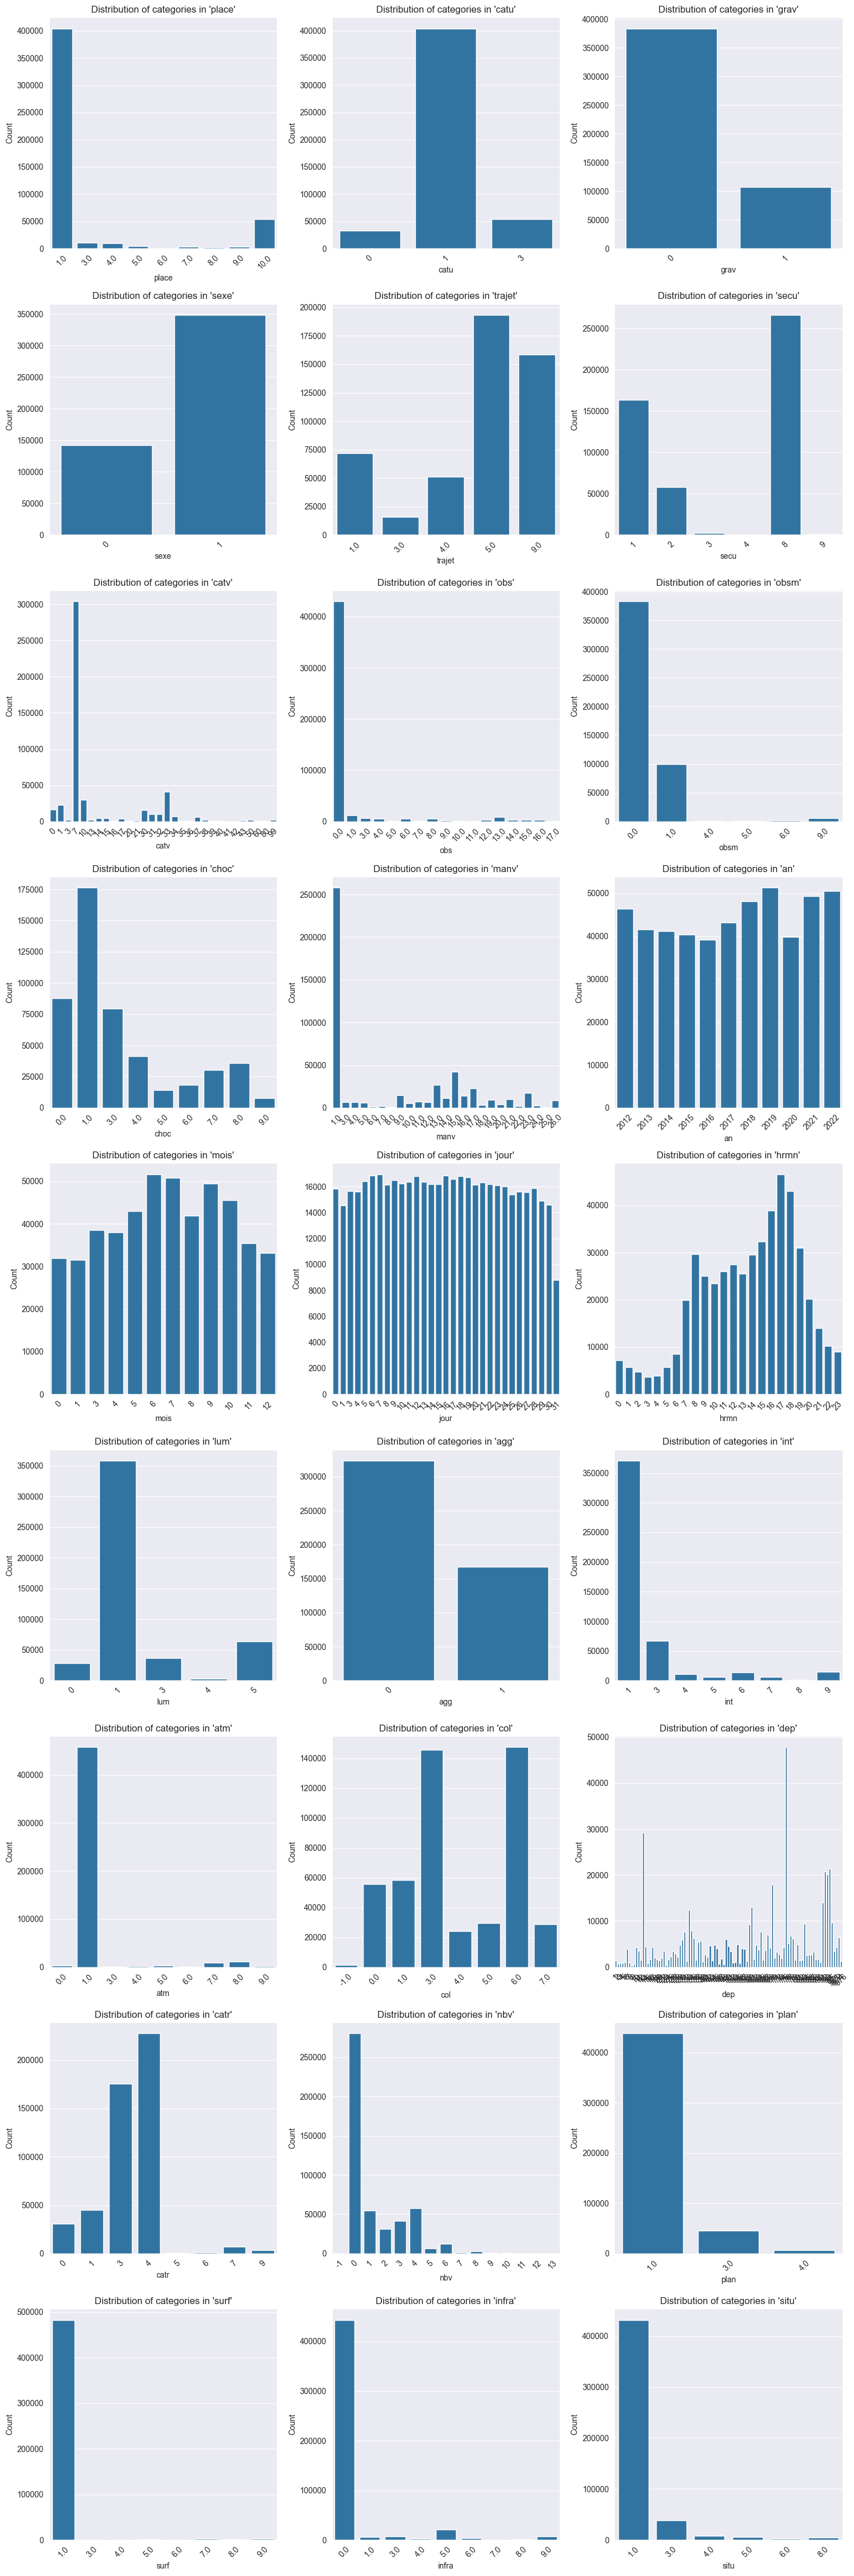

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = train_data.shape[1]
num_rows = (num_cols + 2) // 3  
plt.figure(figsize=(15, num_rows * 5)) 

for i, col in enumerate(train_data.columns):
    plt.subplot(num_rows, 3, i + 1) 
    sns.countplot(data=train_data, x=col)
    plt.title(f"Distribution of categories in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Une première conclusion se trouve entre les variables **"*place*"** et **"*catu*"**. À n'en pas douter, chacune est importante, néanmoins il semble que ces deux variables tendent vers une relation de colinéarité. Ce n'est pas particulièrement étonnant quand on sait que l'une exprime la position des victimes et le second la catégorie d'usager auxquels ils appartiennent. On retrouvera donc autant d'éléments conducteur au sein de **"*catu*"** que d'éléments au sein de la **"*place*"** **"*1*"**. On pourrait faire de même pour les passagers et les piétons. Il est ainsi choisi de supprimer la colonne **"**"**. Cela s'est ainsi réalisé au sein de la construction du fichier de training. 

On observe par ailleurs des disparités au sein des variables binaires notamment :
- **grav** : 380 000 pour 120 000 observations. On apprend donc qu'il y a moins d'accidents graves. 
- **sexe** : 145 000 femmes pour 350 000 hommes impliquées. On apprend donc qu'il y a plus d'hommes impliqués dans des accidents de la route.
- **agg** : 340 000 accidents hors agglomération et 160 000 en agglomération. On apprend donc qu'il y aurait plus d'accidents hors agglomération. 

L'ensemble des variables sont intéressantes pour comprendre les potentielles disparités et ainsi construire un classifieur de qualité.

En travaillant sur un large jeu de données, on s'attend aussi à observer des généralisations de certaines variables comme on peut le faire sur les suivantes :
- **surf** : un pic plus qu'important est présent sur terrain plat. Cela s'explique notamment par le fait que la majorité des routes sont plates. On pensera aux voies à grandes vitesses, comme aux intersections, etc.
- **infra** : de même, on observe un pic en **0** sous entendant l'absence d'infrastructures sur les lieux de l'accident. Ainsi, cette variable ne semble pas jouer un rôle prépondérant au sein de notre jeu de données par son manque de disparité.
- **situ** : malgré la différence entre les accidents sur la chaussée et le reste, il semble important de conserver cette variable notamment si une corrélation importante existe entre l'une des autres valeurs et la gravité de l'accident. Par exemple, on peut supposer que les accidents sur trottoir mènent à 90% à des accidents graves.
- **plan** : il semble que la très grande majorité du temps, les accidents se produisent en ligne droite. malgré tout, quelques exemples surviennent dans d'autres circonstances.
- **atm** : malgré ce que l'on pourrait penser, la majorité des accidents sont survenus dans des conditions normales. il sera intéressant de voir si malgré de faibles données, une tendance se dégage en cas d'intempéries.
- **seuc**: la majorité des équipements sont indéterminables, on espère pouvoir établir une corrélation importante entre la présence d'équipement de sécurité et la diminution de gravité par exemple.
- **catv** : il est intéressant de voir que les VL seul sont les plus représentés, car ils représentent l'ensemble des véhicules présents sur les routes. La surabondance de ces derniers risque à la fois de biaiser l'étude, mais pourrait contribuer à "disculper" d'autres types de véhicules peu impliqués dans des accidents graves.
- **obs, obsm** : la majorité des accidents semblent être provoqués en l'absence d'obstacles qu'ils soient mobiles ou statiques. Il est possible que la faible présence d'obstacles rencontrés mettent en exergue une forme de léthalité de leur part.
- **manv** : il semble que la majorité des accidents se produisent sans changement de file. On observe quelques autres manœuvres impliquées dans un accident au sein desquelles on espère obtenir une corrélation intéresante avec la gravité des accidents.
- **lum** : la majorité des accidents se produisent de jour, mais il serait intéressant de voir si les accidents graves se localisent de nuit par exemple ou si l'éclairage n'a aucune influence dans la gravité des accidents.
- **dep** : on observe sans surprise une corrélation entre le nombre d'accidents et la densité de population. Cette relation est peut-être intéressante pour prédire la gravité d'un accident.
- **int** : malgré une domination des accidents hors intersection, il semble que ce soit néanmoins un facteur dans la création d'accident. Il sera intéressant de se pencher sur cette variable.
- **nbv** : le nombre de voies est majoritairement représenté par la valeur 0 ce qui est une aberration. Ainsi, il faut songer à s'occuper de cette dernière.

D'autres variables sont plus modérées, mais pas nécessairement simple à décrypter à l'aide seule de ces graphiques :
- **trajet** : cette variable est assez bien représenté, ainsi, on espère pouvoir obtenir une corrélation autour de cette dernière.
- **choc** : la répartition est plutôt homogène par rapport à d'autres variables apportant une belle représentation des différentes situations envisageables au cours des accidents. 
- **an/mois/jour** : nous observons une très belle représentation pour chaque catégorie (faiblesse du 31 expliquée par son absence ~1/2 mois).
- **hrmn**: on observe un pic d'accident le soir durant les heures de pointes. Il serait appréciable de déterminer des horaires à accidents graves et à accident mineurs.
- **col** : différentes collisions sont observées et étonnamment l'une des plus importantes n'est pas spécifiée clairement (Autre collision).
- **catr**: il semble que la majorité des routes concernées par les accidents soient les voies communales et les routes départementales. Cependant, au vu des infrastructures présentent pour chaque catégorie, il est possible que les accidents soient plus graves rapidement au sein des routes départementales de par des vitesses autorisées plus importantes et un moindre éclairage.

On décide de supprimer la colonne **'catu'** car trop proche de **'place'**... La variable **surf** est trop sous-représentée pour être exploitable... Il en va de même pour **'nbv'**. De plus, comme notre jeu de données ne contient pas assez de données, nous supprimons aussi **trajet**.

In [32]:
# train_data.drop(labels=['catu', 'surf', 'nbv', 'trajet'], axis=1, inplace=True)

# Random Forest

Afin de pouvoir comprendre l'impact des différentes variables sur la gravité d'un accident, on décide construire un random forest algorithm pour pouvoir se rendre compte de l'importante ce certains paramètres. La variance de cet algorithme sera compensée par la multiplicité des itérations. Ainsi, une tendance générale est non soumise à la haute variance de cet algorithme devrait en ressortir.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = train_data.drop('grav', axis=1)  
y = train_data['grav']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     76927
           1       0.66      0.44      0.53     21249

    accuracy                           0.83     98176
   macro avg       0.76      0.69      0.71     98176
weighted avg       0.82      0.83      0.82     98176

Accuracy: 0.8307936766623207


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = train_data.drop('grav', axis=1)  
y = train_data['grav']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     76927
           1       0.67      0.45      0.54     21249

    accuracy                           0.83     98176
   macro avg       0.77      0.69      0.72     98176
weighted avg       0.82      0.83      0.82     98176

Accuracy: 0.8329734354628422


On décide par curiosité de tester notre modèle sur notre jeu de test, on s'attend à une valeur en dessous de 0.83 proche des 0.75-0.77 d'accuracy au sens de l'AUC sur Kaggle :

In [37]:
test_data = pd.read_csv('Filtered_Data/TEST/Full_Test_Data_Reduced_Mode.csv', sep=',', low_memory=False)

X_Num_Acc = test_data['Num_Acc']
X_pred = test_data.drop('Num_Acc', axis=1)
X_pred = X_pred[X.columns]

Y_pred = rf_classifier.predict_proba(X_pred)[:, 1]

result_rf = pd.DataFrame({'Num_Acc' : X_Num_Acc, 'GRAVE' : Y_pred})
result_rf = result_rf.groupby('Num_Acc')['GRAVE'].mean().reset_index()

result_rf.to_csv('Filtered_Data/TEST/Probability_RF.csv', index=False, header=True)

SCORE : 0.75361

Un problème auquel nous devons actuellement faire face est la disparité des données comme nous pouvons le voir ci-dessous :

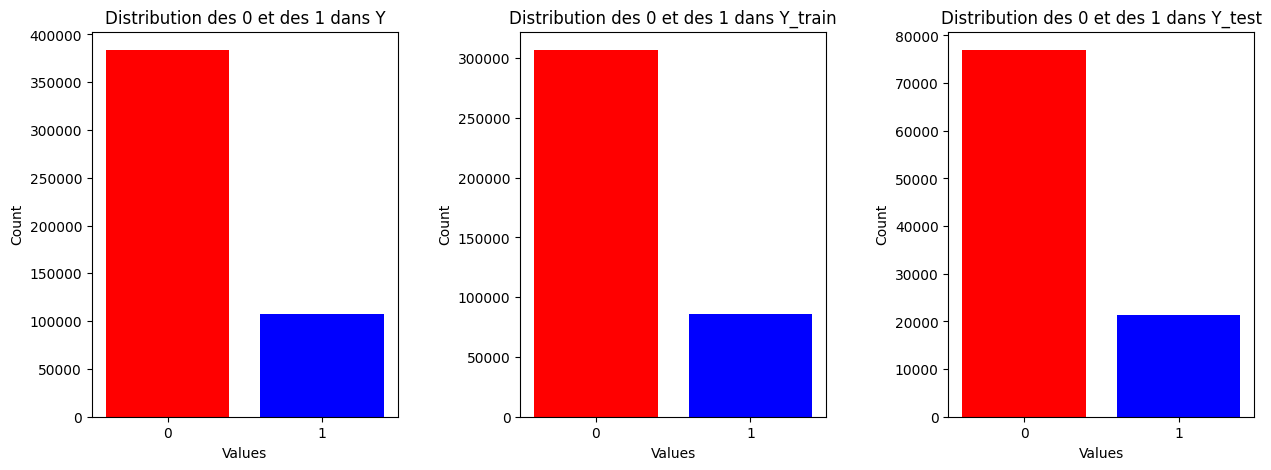

In [47]:
def plot_distribution(y_series, title):
    counts = y_series.value_counts()

    plt.bar(counts.index, counts.values, color=['red', 'blue'])
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.xticks(counts.index, ['0', '1'])

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_distribution(y, 'Distribution des 0 et des 1 dans Y')

plt.subplot(1, 3, 2)
plot_distribution(y_train, 'Distribution des 0 et des 1 dans Y_train')

plt.subplot(1, 3, 3)
plot_distribution(y_test, 'Distribution des 0 et des 1 dans Y_test')

plt.subplots_adjust(wspace=0.4)
plt.show()

Nous décidons donc d'adopter une première approche où la réduction de la présence des **"1"** sera favorisée. On se penchera sur la qualité des résultats :

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

X = train_data.drop('grav', axis=1)
y = train_data['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X = pd.concat([X_train, y_train], axis=1)
minority = X[X.grav==1]
majority = X[X.grav==0]

majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
downsampled = pd.concat([majority_downsampled, minority])

print(downsampled.grav.value_counts())

y_train = downsampled.grav
X_train = downsampled.drop('grav', axis=1)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

grav
0    85733
1    85733
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.75      0.83     76743
           1       0.48      0.81      0.60     21433

    accuracy                           0.77     98176
   macro avg       0.71      0.78      0.72     98176
weighted avg       0.83      0.77      0.78     98176

Accuracy: 0.7652073826597132


On décide dans un second temps d'explorer l'oversampling des valeurs minoritaires pour voir si cela contrebalance l'imprécision sur cette dernière.

In [49]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

X = train_data.drop('grav', axis=1)
y = train_data['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    
    y_pred = pipeline.predict(X_val_fold)
    scores.append(accuracy_score(y_val_fold, y_pred))

    print(f"Classification Report for the current fold:\n{classification_report(y_val_fold, y_pred)}")

average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy}")

Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     61395
           1       0.66      0.45      0.53     17146

    accuracy                           0.83     78541
   macro avg       0.76      0.69      0.72     78541
weighted avg       0.82      0.83      0.82     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     61394
           1       0.66      0.44      0.53     17147

    accuracy                           0.83     78541
   macro avg       0.76      0.69      0.71     78541
weighted avg       0.81      0.83      0.82     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     61394
           1       0.67      0.45      0.54     17147

    accuracy                           0.83     7854

SI l'on se penche sur les informations fournies, on notera que la classe **0** est prédite avec une précision de **0.86** et une haute valeur de recall (**0.94**) et de F1-Score (**0.90**). Autrement dit, Le modèle est doué pour prédire les valeurs **0** qui doivent l'être. Néanmoins, le modèle est moins doué en termes de précision pour la classe **1** (**0.66**). Le recall est de **0.45**, identifiant donc moins de **50%** des vrais **1**. De plus, le F1-Score est de **0.53**. Il y a ainsi une mauvaise gestion de la classe **0**.

Afin de contrebalancer cette mauvaise gestion des classes, nous tentons une approche reposant sur l'ajustement des poids :

In [50]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

X = train_data.drop('grav', axis=1)
y = train_data['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          class_weight={0:1, 1:3},
                                          random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    
    y_pred = pipeline.predict(X_val_fold)
    scores.append(accuracy_score(y_val_fold, y_pred))

    print(f"Classification Report for the current fold:\n{classification_report(y_val_fold, y_pred)}")

average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy}")

Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     61395
           1       0.67      0.42      0.52     17146

    accuracy                           0.83     78541
   macro avg       0.76      0.68      0.71     78541
weighted avg       0.81      0.83      0.81     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     61394
           1       0.67      0.42      0.52     17147

    accuracy                           0.83     78541
   macro avg       0.76      0.68      0.71     78541
weighted avg       0.81      0.83      0.81     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     61394
           1       0.68      0.42      0.52     17147

    accuracy                           0.83     7854

In [51]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

X = train_data.drop('grav', axis=1)
y = train_data['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          class_weight={0:1, 1:5},
                                          random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    
    y_pred = pipeline.predict(X_val_fold)
    scores.append(accuracy_score(y_val_fold, y_pred))

    print(f"Classification Report for the current fold:\n{classification_report(y_val_fold, y_pred)}")

average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy}")

Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     61395
           1       0.67      0.41      0.51     17146

    accuracy                           0.83     78541
   macro avg       0.76      0.68      0.70     78541
weighted avg       0.81      0.83      0.81     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     61394
           1       0.67      0.42      0.51     17147

    accuracy                           0.83     78541
   macro avg       0.76      0.68      0.70     78541
weighted avg       0.81      0.83      0.81     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     61394
           1       0.68      0.42      0.52     17147

    accuracy                           0.83     7854

On explora l'éventualité du treshold :

In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

X = train_data.drop('grav', axis=1)
y = train_data['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          class_weight={0:1, 1:5},
                                          random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    
    y_probs = pipeline.predict_proba(X_val_fold)[:, 1]
    y_pred = (y_probs > 0.4).astype(int)
    
    scores.append(accuracy_score(y_val_fold, y_pred))

    print(f"Classification Report for the current fold:\n{classification_report(y_val_fold, y_pred)}")

average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy}")

Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     61395
           1       0.62      0.56      0.59     17146

    accuracy                           0.83     78541
   macro avg       0.75      0.73      0.74     78541
weighted avg       0.82      0.83      0.83     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     61394
           1       0.61      0.56      0.59     17147

    accuracy                           0.83     78541
   macro avg       0.75      0.73      0.74     78541
weighted avg       0.82      0.83      0.82     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     61394
           1       0.62      0.56      0.59     17147

    accuracy                           0.83     7854

In [53]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

X = train_data.drop('grav', axis=1)
y = train_data['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100,random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    
    y_probs = pipeline.predict_proba(X_val_fold)[:, 1]
    y_pred = (y_probs > 0.6).astype(int)
    
    scores.append(accuracy_score(y_val_fold, y_pred))

    print(f"Classification Report for the current fold:\n{classification_report(y_val_fold, y_pred)}")

average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy}")

Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     61395
           1       0.72      0.28      0.41     17146

    accuracy                           0.82     78541
   macro avg       0.78      0.63      0.65     78541
weighted avg       0.81      0.82      0.79     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     61394
           1       0.72      0.28      0.40     17147

    accuracy                           0.82     78541
   macro avg       0.78      0.62      0.65     78541
weighted avg       0.81      0.82      0.79     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     61394
           1       0.73      0.28      0.40     17147

    accuracy                           0.82     7854

In [55]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
import numpy as np

X = train_data.drop('grav', axis=1)
y = train_data['grav']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Setup pipeline with ADASYN and RandomForestClassifier
pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Setup StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

# Perform stratified k-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the pipeline
    pipeline.fit(X_train_fold, y_train_fold)
    
    # Get probabilities for class 1
    y_probs = pipeline.predict_proba(X_val_fold)[:, 1]
    # Convert probabilities to class labels based on a threshold
    y_pred = (y_probs > 0.5).astype(int)  # Using default threshold of 0.5

    # Calculate accuracy
    scores.append(accuracy_score(y_val_fold, y_pred))
    
    # Output the classification report for the current fold
    print(f"Classification Report for the current fold:\n{classification_report(y_val_fold, y_pred)}")

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy}")

Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     61395
           1       0.67      0.45      0.54     17146

    accuracy                           0.83     78541
   macro avg       0.76      0.69      0.72     78541
weighted avg       0.82      0.83      0.82     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     61394
           1       0.66      0.45      0.54     17147

    accuracy                           0.83     78541
   macro avg       0.76      0.69      0.72     78541
weighted avg       0.82      0.83      0.82     78541
Classification Report for the current fold:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     61394
           1       0.67      0.45      0.54     17147

    accuracy                           0.83     7854

Comme il n'y a pas de solutions qui fonctionne, on décide de continuer le feature engineering pour créer de nouvelles variables plus aptes à classifier nos valeurs.

In [60]:
from scipy.stats import chi2_contingency

features = [col for col in train_data.columns if col != 'grav']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

cramers_v_scores = {feature: cramers_v(train_data['grav'], train_data[feature]) for feature in features}

sorted_scores = sorted(cramers_v_scores.items(), key=lambda item: item[1], reverse=True)
for feature, score in sorted_scores:
    print(f"Cramér's V between grav and {feature}: {score:.4f}")

Cramér's V between grav and dep: 0.2567
Cramér's V between grav and catv: 0.2321
Cramér's V between grav and manv: 0.2130
Cramér's V between grav and col: 0.2122
Cramér's V between grav and catr: 0.2000
Cramér's V between grav and secu: 0.1846
Cramér's V between grav and obs: 0.1780
Cramér's V between grav and agg: 0.1733
Cramér's V between grav and choc: 0.1668
Cramér's V between grav and trajet: 0.1464
Cramér's V between grav and place: 0.1425
Cramér's V between grav and catu: 0.1416
Cramér's V between grav and nbv: 0.1392
Cramér's V between grav and situ: 0.1263
Cramér's V between grav and plan: 0.1084
Cramér's V between grav and lum: 0.1030
Cramér's V between grav and int: 0.0859
Cramér's V between grav and hrmn: 0.0748
Cramér's V between grav and an: 0.0538
Cramér's V between grav and obsm: 0.0433
Cramér's V between grav and atm: 0.0421
Cramér's V between grav and surf: 0.0380
Cramér's V between grav and sexe: 0.0337
Cramér's V between grav and infra: 0.0326
Cramér's V between gra

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

features_to_keep = ['dep', 'catv', 'manv', 'col', 'catr', 'secu', 'obs', 'agg', 'choc', 'place', 'situ', 'plan', 'lum', 'int']
features_to_keep.append('grav')

test_partial_data = train_data[features_to_keep]

X = test_partial_data.drop('grav', axis=1)
y = test_partial_data['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     76927
           1       0.59      0.46      0.52     21249

    accuracy                           0.81     98176
   macro avg       0.72      0.69      0.70     98176
weighted avg       0.80      0.81      0.80     98176

Accuracy: 0.8136611799217731


In [61]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

data = train_data

target = 'grav' 
features = [col for col in data.columns if col != target]

for feature in features:
    if data[feature].dtype == 'object':
        data[feature] = LabelEncoder().fit_transform(data[feature])

def combine_features(data, combo):
    return data[list(combo)].astype(str).agg('_'.join, axis=1)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

for r in range(2, 4):
    for combo in combinations(features, r):
        new_feature_name = '_'.join(combo)
        data[new_feature_name] = combine_features(data, combo)

        X = data[[new_feature_name]]
        y = data[target]

        scores = cross_val_score(clf, pd.get_dummies(X), y, cv=3, scoring='accuracy')

        print(f"CV Accuracy for {new_feature_name}: {scores.mean():.4f}")

CV Accuracy for place_catu: 0.7817
CV Accuracy for place_sexe: 0.7817
CV Accuracy for place_trajet: 0.7825
CV Accuracy for place_secu: 0.7817
CV Accuracy for place_catv: 0.7831
CV Accuracy for place_obs: 0.7854
CV Accuracy for place_obsm: 0.7810
CV Accuracy for place_choc: 0.7817
CV Accuracy for place_manv: 0.7815
CV Accuracy for place_an: 0.7285
CV Accuracy for place_mois: 0.7817
CV Accuracy for place_jour: 0.7817
CV Accuracy for place_hrmn: 0.7819
CV Accuracy for place_lum: 0.7835
CV Accuracy for place_agg: 0.7843
CV Accuracy for place_int: 0.7817
CV Accuracy for place_atm: 0.7820
CV Accuracy for place_col: 0.7815
CV Accuracy for place_dep: 0.7854
CV Accuracy for place_catr: 0.7825
CV Accuracy for place_nbv: 0.7817
CV Accuracy for place_plan: 0.7817
CV Accuracy for place_surf: 0.7816
CV Accuracy for place_infra: 0.7817
CV Accuracy for place_situ: 0.7605
CV Accuracy for catu_sexe: 0.7817


KeyboardInterrupt: 

CV Accuracy for place_catu: 0.7817
CV Accuracy for place_sexe: 0.7817
CV Accuracy for place_trajet: 0.7825
CV Accuracy for place_secu: 0.7817
CV Accuracy for place_catv: 0.7831
CV Accuracy for place_obs: 0.7854
CV Accuracy for place_obsm: 0.7810
CV Accuracy for place_choc: 0.7817
CV Accuracy for place_manv: 0.7815
CV Accuracy for place_an: 0.7285
CV Accuracy for place_mois: 0.7817
CV Accuracy for place_jour: 0.7817
CV Accuracy for place_hrmn: 0.7819
CV Accuracy for place_lum: 0.7835
CV Accuracy for place_agg: 0.7843
CV Accuracy for place_int: 0.7817
CV Accuracy for place_atm: 0.7820
CV Accuracy for place_col: 0.7815
CV Accuracy for place_dep: 0.7854
CV Accuracy for place_catr: 0.7825
CV Accuracy for place_nbv: 0.7817
CV Accuracy for place_plan: 0.7817
CV Accuracy for place_surf: 0.7816
CV Accuracy for place_infra: 0.7817
CV Accuracy for place_situ: 0.7605

On teste nos données avec un nouveau modèle, le LightGBM ou light gradient boosting machine 

In [31]:
train_data = pd.read_csv('Filtered_Data/TRAIN/Filtered_Train_Data_V4_to_V4.csv', sep=',', low_memory=False)

for column in train_data.columns:
    train_data[column] = train_data[column].astype('category')
    
train_data.head()

,place,catu,grav,sexe,trajet,secu,catv,obs,obsm,choc,...,int,atm,col,dep,catr,nbv,plan,surf,infra,situ
0,1.0,1,0,1,5.0,8,7,0.0,0.0,3.0,...,1,1.0,3.0,59,3,0,1.0,1.0,0.0,1.0
1,1.0,1,0,1,5.0,2,33,0.0,0.0,8.0,...,1,1.0,3.0,59,3,0,1.0,1.0,0.0,1.0
2,1.0,1,0,0,5.0,1,7,0.0,0.0,1.0,...,1,1.0,5.0,59,3,0,3.0,1.0,0.0,1.0
3,1.0,1,0,0,5.0,1,7,0.0,0.0,8.0,...,1,1.0,5.0,59,3,0,3.0,1.0,0.0,1.0
4,1.0,1,0,1,5.0,2,33,0.0,0.0,3.0,...,1,1.0,5.0,59,3,0,3.0,1.0,0.0,1.0


In [32]:
test_data = pd.read_csv('Filtered_Data/TEST/Full_Test_Data_Reduced_Mode.csv', sep=',', low_memory=False)

for column in test_data.columns:
    test_data[column] = test_data[column].astype('category')
    
test_data.head()

,Num_Acc,place,catu,sexe,secu,catv,obs,obsm,choc,manv,...,int,atm,col,dep,catr,nbv,plan,surf,infra,situ
0,201200049538,1.0,1,0.0,1,7,0.0,2.0,4.0,2.0,...,1.0,1.0,4.0,93.0,1,4.0,1.0,1.0,1.0,1.0
1,201200049538,1.0,1,0.0,1,7,0.0,0.0,5.0,2.0,...,1.0,1.0,4.0,93.0,1,4.0,1.0,1.0,1.0,1.0
2,201200049538,1.0,1,0.0,1,7,0.0,2.0,1.0,2.0,...,1.0,1.0,4.0,93.0,1,4.0,1.0,1.0,1.0,1.0
3,201200004221,1.0,1,1.0,2,33,0.0,6.0,1.0,1.0,...,1.0,1.0,6.0,46.0,3,2.0,1.0,1.0,0.0,1.0
4,201200002457,1.0,1,1.0,1,7,0.0,2.0,3.0,15.0,...,1.0,1.0,1.0,85.0,3,0.0,1.0,1.0,5.0,1.0


In [33]:
import lightgbm as ltb

In [34]:
X = train_data.drop(['grav', 'trajet'], axis=1)
y = train_data['grav']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

model = ltb.LGBMClassifier()
model.fit(X_train, y_train)

pred_y = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, pred_y))

[LightGBM] [Info] Number of positive: 75089, number of negative: 268527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 343616, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218526 -> initscore=-1.274277
[LightGBM] [Info] Start training from score -1.274277
Accuracy: 0.8364705562798783


In [35]:
X_Num_Acc = test_data['Num_Acc']
X_pred = test_data.drop('Num_Acc', axis=1)
X_pred = X_pred[X.columns]

Y_pred = model.predict_proba(X_pred)[:, 1]

result_rf = pd.DataFrame({'Num_Acc' : X_Num_Acc, 'GRAVE' : Y_pred})
result_rf = result_rf.groupby('Num_Acc')['GRAVE'].mean().reset_index()

result_rf.to_csv('Filtered_Data/TEST/Probability_GLM.csv', index=False, header=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10272\802002872.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_rf = result_rf.groupby('Num_Acc')['GRAVE'].mean().reset_index()


SCORE : 0.78486